In [9]:
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 1_000_000_000, R_on: float = 1_000, V_th: float = 0.35, V_hold: float = 0.1) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if self.state == 'off' and  np.abs(voltage) < self.V_th:
            return self.R_off
        elif self.state == 'off' and np.abs(voltage) > self.V_th:
            self.state = 'on'
            return self.R_on
        elif self.state == 'on' and np.abs(voltage) > self.V_hold:
            return self.R_on
        elif self.state == 'on' and np.abs(voltage) < self.V_hold:
            self.state = 'off'
            return self.R_off

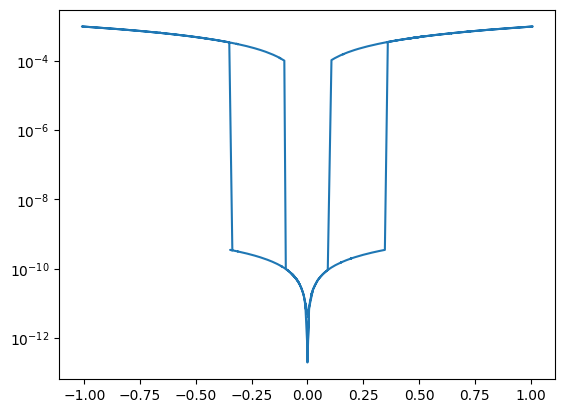

In [12]:
n = 1000
V = np.sin(np.linspace(0, 2 * np.pi, n)) +  np.array([np.random.normal(0,0.005) for _ in range(n)])
ts = ThresholdSwitch()
I = np.array([v / ts.get_resistance(v) for v in V])
plt.plot(V, np.abs(I))
plt.yscale('log')